# Online Payments Fraud Detection DataSet Case Study #

                         ************Blossom Bank UK****************

# Objective - Build a machine learning model to predict online payment fraud

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
BB = pd.read_csv('Online Payment Fraud Detection.csv')
BB.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
BB.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [6]:
BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
BB.shape

(1048575, 10)

In [8]:
BB.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
BB.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# Exploratory Analysis

In [10]:
#Types of transaction count
BB.groupby('type').amount.count().sort_values(ascending=False)

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: amount, dtype: int64

In [16]:
#Count of transactions that isfraud.... 
fraud=BB.groupby('isFraud').amount.count()
fraud

isFraud
0    1047433
1       1142
Name: amount, dtype: int64

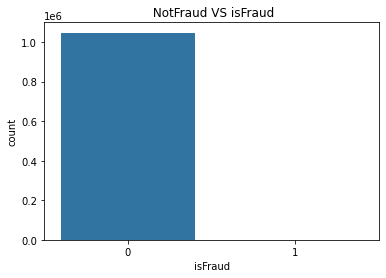

In [12]:
# Visuals of what proportion of total transaction isfraud
# 0 = Not Fraud
# 1 = IsFraud
# A minute fraction of the total transaction isfraud
sns.countplot(x='isFraud',data=BB).set_title(" NotFraud VS isFraud")
plt.show()

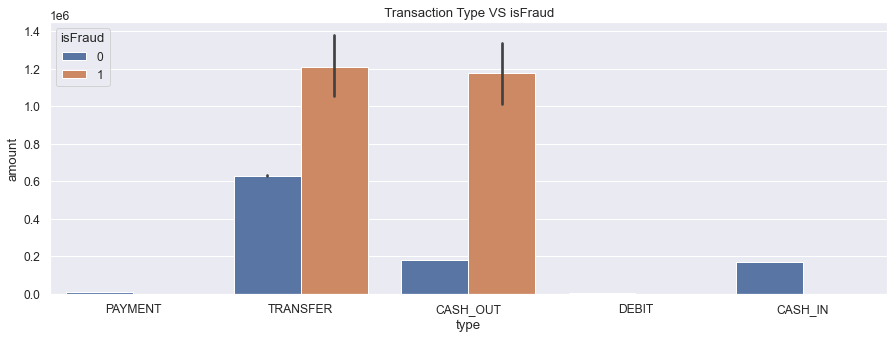

In [13]:
# Spread of isFraud accross type of transactions type
sns.set_theme(font_scale=1.10)
plt.figure(figsize=(15,5))
sns.barplot(x='type',
                y='amount',
                 hue='isFraud',
                 data=BB,
                ).set_title(" Transaction Type VS isFraud")
plt.show()

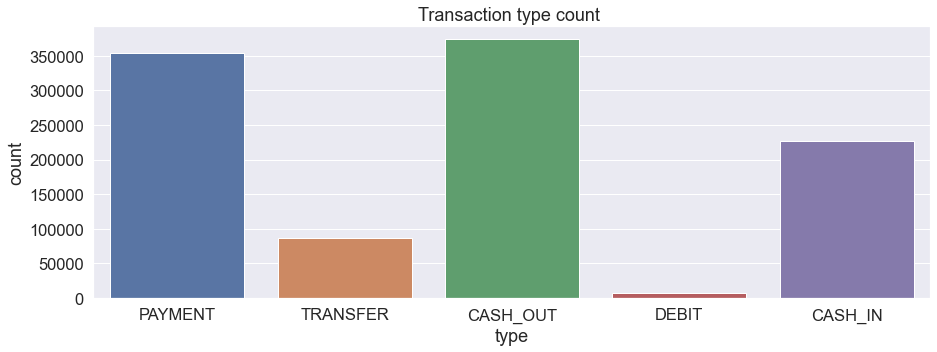

In [14]:
#Transaction type count
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,5))
sns.countplot(x='type',data=BB).set_title("Transaction type count ")
plt.show()

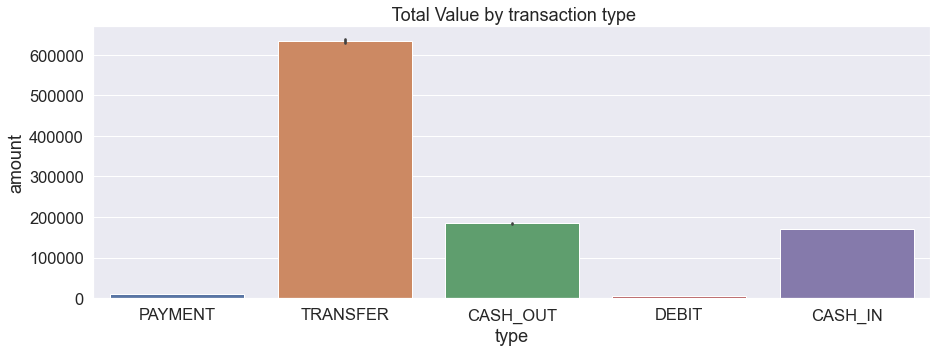

In [17]:
# Sum value per transation
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,5))
sns.barplot(x='type',y='amount',data=BB).set_title(" Total Value by transaction type")
plt.show()

<AxesSubplot:ylabel='amount'>

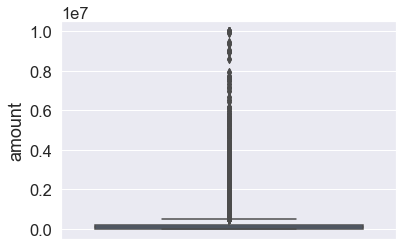

In [18]:
# Check for outliers in the transaction amount coloumn
# Outliers present
sns.boxplot(data=BB,y='amount')

<AxesSubplot:>

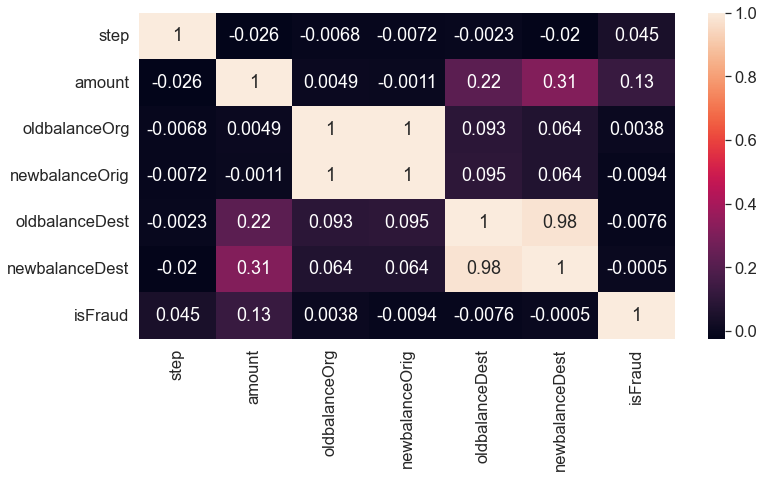

In [20]:
# relationship between each columns using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(BB.corr(),annot=True)

# Machine Learning 

In [24]:
ML= [ 'type']

In [25]:
ML_dummies= pd.get_dummies(BB[ML])

In [26]:
ML_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [28]:
prict = pd.concat([BB,ML_dummies], axis=1)
print(prict.shape)
prict.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [29]:
prict_BB = prict.drop(ML,axis=1)

prict_BB

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0,0,0,1,0


In [41]:
 #importing libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [42]:
y=BB.isFraud

In [43]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [44]:
X=prict_BB.drop(columns=['isFraud','nameOrig','nameDest'])
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [49]:
model=LogisticRegression()
model.fit(X,y)
pre=model.predict(X_test)
score=accuracy_score(y_test,pre)
Fraud=(score*100)
nfraud=100-(score*100)
print(f'{Fraud}% of the Transaction is Non-Fraund')
print(f'{nfraud}% of the Transaction is Fraud')
#print(classification_report(pre,y_test)) 

99.8960494003767% of the Transaction is Non-Fraund
0.10395059962330322% of the Transaction is Fraud


In [50]:
model=DecisionTreeClassifier()
model.fit(X,y)
pre=model.predict(X_test)
score=accuracy_score(y_test,pre)
Fraud=(score*100)
nfraud=100-(score*100)
print(f'{Fraud}% of the Transaction is Non-Fraund')
print(f'{nfraud}% of the Transaction is Fraud')
#print(classification_report(pre,y_test))

100.0% of the Transaction is Non-Fraund
0.0% of the Transaction is Fraud
